# Digit Recognizer: Learn computer vision fundamentals with the famous MNIST data
* 1.Defining the problem statement
* 2.Collecting the data
* 3.Exploratory data analysis
* 4.Feature engineering
* 5.Modelling
* 6.Testing

# 1. Defining the problem statement
The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.
Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive.

# 2. Collecting the data
download from https://www.kaggle.com/c/digit-recognizer/data
### load train, test dataset using Pandas

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

train = pd.read_csv("E:/kaggle/digit recognizer/train.csv")
test = pd.read_csv("E:/kaggle/digit recognizer/test.csv")
submit = pd.read_csv('E:/kaggle/digit recognizer/sample_submission.csv')

### import packages for visualization

In [2]:
import numpy as np # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 3. Exploratory data analysis
## 3.1 Exploring data without Categorical Features
* info
* shape
* head
* isnull().sum()
* describe

In [3]:
train.info()  # data stucture

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [6]:
train.shape   # data size

(42000, 785)

In [7]:
test.shape 

(28000, 784)

In [8]:
train.head()  # first 5 datas

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
test.head()  # first 5 datas

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train.isnull().sum().sum()

0

In [11]:
test.isnull().sum().sum()

0

In [12]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [13]:
test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


## 3.2 Exploring data with Categorical Features
### barchart

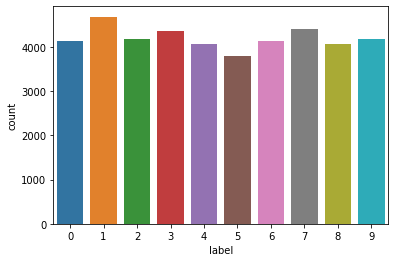

In [14]:
sns.countplot(x="label", data=train)

The chart shows the data is balance.

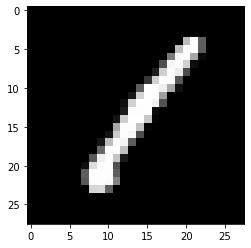

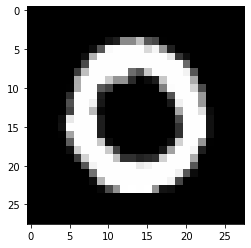

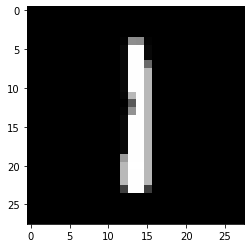

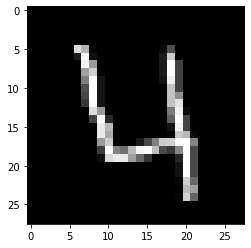

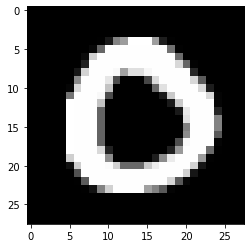

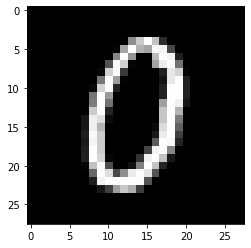

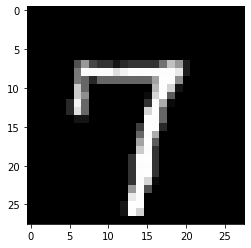

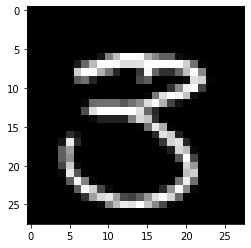

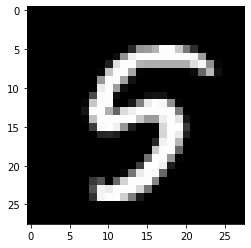

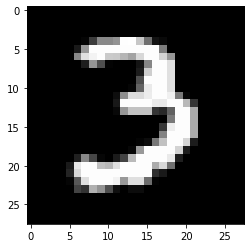

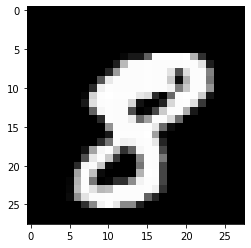

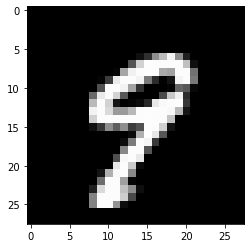

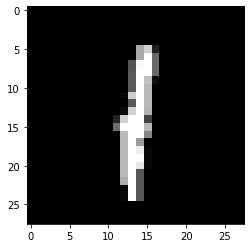

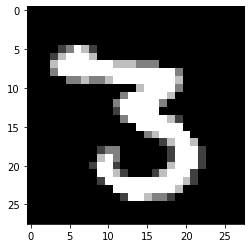

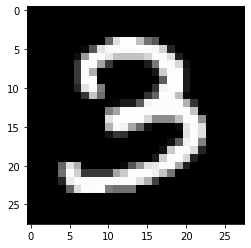

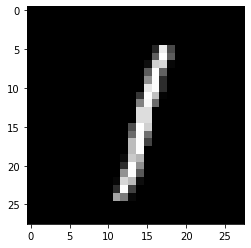

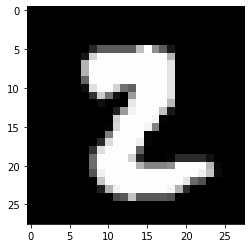

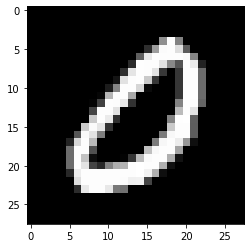

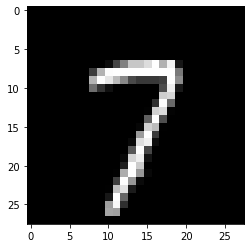

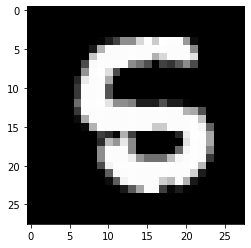

In [41]:
X_train = train.values[0:,1:]
for i in range(20):
    plt.imshow(X_train[i].reshape(28,28), cmap='gray') # 用array,不能dataframe
    plt.show()

# 4. Feature engineering

In [16]:
train_x = train.drop('label', axis=1)
train_y = train['label']
test_x = test

## 4.1 deskewing images
https://fsix.github.io/mnist/Deskewing.html

### functions used for deskewing

In [17]:
# Function to first calculate moments of the image data, which is the first step to deskewing the image
from scipy.ndimage import interpolation

def moments(image):
    c0,c1 = np.mgrid[:image.shape[0],:image.shape[1]] # A trick in numPy to create a mesh grid
    totalImage = np.sum(image) #sum of pixels
    m0 = np.sum(c0*image)/totalImage #mu_x
    m1 = np.sum(c1*image)/totalImage #mu_y
    m00 = np.sum((c0-m0)**2*image)/totalImage #var(x)
    m11 = np.sum((c1-m1)**2*image)/totalImage #var(y)
    m01 = np.sum((c0-m0)*(c1-m1)*image)/totalImage #covariance(x,y)
    mu_vector = np.array([m0,m1]) # Notice that these are \mu_x, \mu_y respectively
    covariance_matrix = np.array([[m00,m01],[m01,m11]]) # Do you see a similarity between the covariance matrix
    return mu_vector, covariance_matrix

In [18]:
# Function used for deskewing the image which internally first calls the moment function described above
def deskew(image):
    c,v = moments(image)
    alpha = v[0,1]/v[0,0]
    affine = np.array([[1,0],[alpha,1]])
    ocenter = np.array(image.shape)/2.0
    offset = c-np.dot(affine,ocenter)
    return interpolation.affine_transform(image,affine,offset=offset)

### deskewing training

In [19]:
# Deskewing the data

train_x_deskew = train_x.apply(lambda x: deskew(x.values.reshape(28,28)).flatten(),axis=1)

In [20]:
# to dataframe
train_x_deskew_df = train_x
for i in range(42000):
    train_x_deskew_df.iloc[i,:] = train_x_deskew[i]

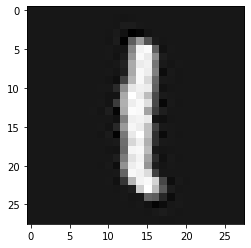

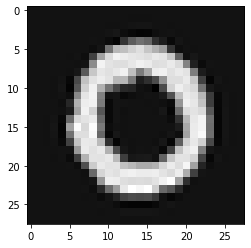

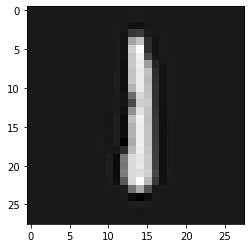

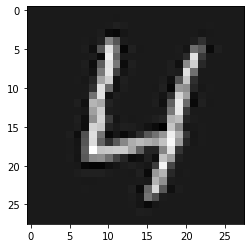

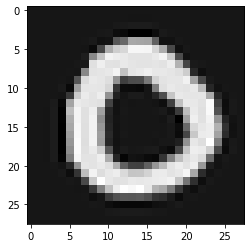

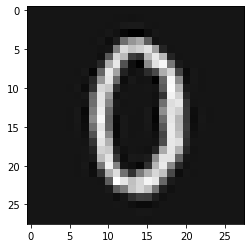

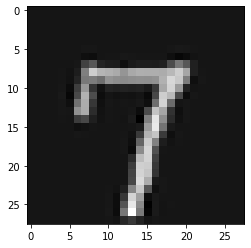

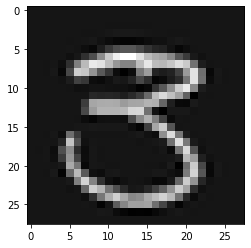

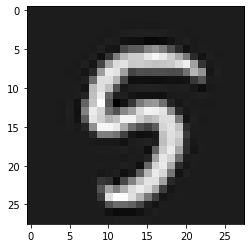

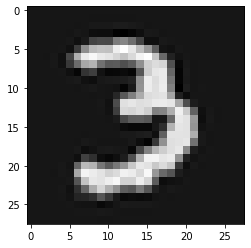

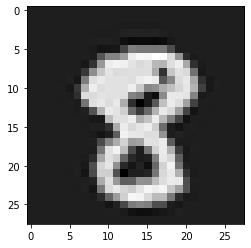

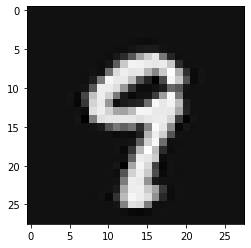

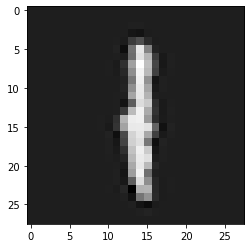

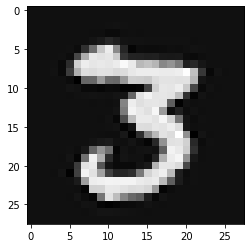

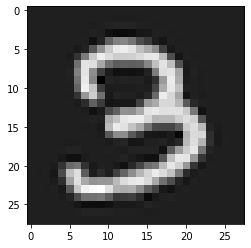

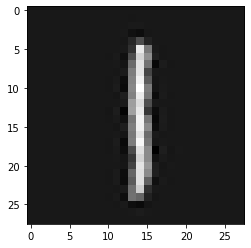

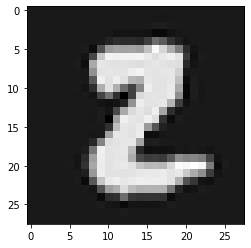

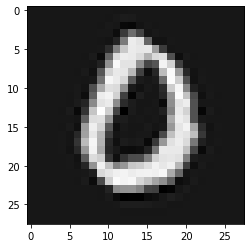

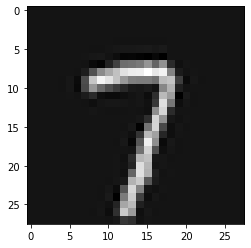

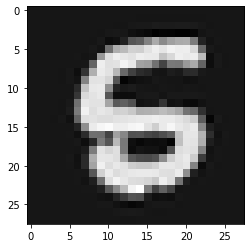

In [21]:
for i in range(20):
    plt.imshow(train_x_deskew_df.values[i].reshape(28,28), cmap='gray') # 用array,不能dataframe
    plt.show()

In [22]:
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler()
train_x_deskew_minmax = minmax.fit_transform(train_x_deskew_df)
train_x_deskew_minmax = pd.DataFrame(train_x_deskew_minmax)

In [23]:
train_x_deskew_minmax.isnull().sum().sum()

0

In [24]:
train_x_deskew_minmax.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0
mean,0.0,0.0,0.000024,0.000048,0.000048,0.333325,0.777738,0.769192,0.666637,0.799955,...,0.68742,0.684201,0.666638,0.761880,0.749999,0.846126,0.499988,0.000048,0.0,0.0
std,0.0,0.0,0.004880,0.006901,0.006901,0.004303,0.005172,0.006041,0.007397,0.008114,...,0.01644,0.008242,0.006438,0.005538,0.004595,0.004551,0.004226,0.006901,0.0,0.0
min,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.0,0.0,0.000000,0.000000,0.000000,0.333333,0.777778,0.769231,0.666667,0.800000,...,0.68750,0.684211,0.666667,0.761905,0.750000,0.846154,0.500000,0.000000,0.0,0.0
50%,0.0,0.0,0.000000,0.000000,0.000000,0.333333,0.777778,0.769231,0.666667,0.800000,...,0.68750,0.684211,0.666667,0.761905,0.750000,0.846154,0.500000,0.000000,0.0,0.0
75%,0.0,0.0,0.000000,0.000000,0.000000,0.333333,0.777778,0.769231,0.666667,0.800000,...,0.68750,0.684211,0.666667,0.761905,0.750000,0.846154,0.500000,0.000000,0.0,0.0
max,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0


### SVM

In [25]:
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x_deskew_minmax,
                                                    train_y,
                                                    test_size = 0.1,
                                                    random_state = 87)

clf = SVC()
clf.fit(X_train, y_train)
predict_result = clf.predict(X_test)
predict_score = accuracy_score(y_test, predict_result)
print(predict_score)

0.9807142857142858


### deskewing testing

In [26]:
# Deskewing the data
test_x_deskew=test_x.apply(lambda x: deskew(x.values.reshape(28,28)).flatten(),axis=1)

# to dataframe
test_x_deskew_df = test_x
for i in range(28000):
    test_x_deskew_df.iloc[i,:] = test_x_deskew[i]

In [27]:
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler()
test_x_deskew_minmax = minmax.fit_transform(test_x_deskew_df)
test_x_deskew_minmax = pd.DataFrame(test_x_deskew_minmax)

In [28]:
test_x_deskew_minmax.isnull().sum().sum()

0

In [29]:
test_x_deskew_minmax.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,28000.0,28000.0,28000.0,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000
mean,0.0,0.0,0.0,0.000054,0.333357,0.500027,0.250018,0.166726,0.500068,0.807701,...,0.228561,0.399991,0.288144,0.148944,0.705840,0.874915,0.499911,0.999946,0.999929,0.999964
std,0.0,0.0,0.0,0.006681,0.005634,0.006847,0.009449,0.008909,0.009430,0.006662,...,0.006236,0.007391,0.004939,0.005280,0.004794,0.006022,0.007905,0.006681,0.008451,0.005976
min,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,0.000000,0.333333,0.500000,0.250000,0.166667,0.500000,0.807692,...,0.228571,0.400000,0.288136,0.148936,0.705882,0.875000,0.500000,1.000000,1.000000,1.000000
50%,0.0,0.0,0.0,0.000000,0.333333,0.500000,0.250000,0.166667,0.500000,0.807692,...,0.228571,0.400000,0.288136,0.148936,0.705882,0.875000,0.500000,1.000000,1.000000,1.000000
75%,0.0,0.0,0.0,0.000000,0.333333,0.500000,0.250000,0.166667,0.500000,0.807692,...,0.228571,0.400000,0.288136,0.148936,0.705882,0.875000,0.500000,1.000000,1.000000,1.000000
max,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 4.2 dimension reduction

### PCA

In [30]:
from sklearn.decomposition import PCA 
from sklearn import metrics
def n_component_analysis(n,X_train, y_train, X_val, y_val,kernel_type="linear"):
   
    pca = PCA(n_components=n)
    print("PCA begin with n_components: {}".format(n))
    pca.fit(X_train)

    X_train_pca = pca.transform(X_train)
    X_val_pca = pca.transform(X_val)

    print('SVC begin')
    clf1 = SVC(kernel=kernel_type)
    clf1.fit(X_train_pca, y_train)
    predictions=clf1.predict(X_val_pca)
    accuracy = metrics.accuracy_score(y_val,predictions)
    
    print("accuracy: {}".format(accuracy))
    return accuracy

In [31]:
# Calling the PCA function above where kernel is linear by default and see if we ca improve our accuracy
n_s = np.linspace(0.8, 0.95, num=15)
accuracy = []

for n in n_s:
    tmp = n_component_analysis(n, X_train, y_train, X_test, y_test, "rbf")
    accuracy.append(tmp)

PCA begin with n_components: 0.8
SVC begin
accuracy: 0.9857142857142858
PCA begin with n_components: 0.8107142857142857
SVC begin
accuracy: 0.9859523809523809
PCA begin with n_components: 0.8214285714285715
SVC begin
accuracy: 0.9857142857142858
PCA begin with n_components: 0.8321428571428572
SVC begin
accuracy: 0.9861904761904762
PCA begin with n_components: 0.8428571428571429
SVC begin
accuracy: 0.9861904761904762
PCA begin with n_components: 0.8535714285714285
SVC begin
accuracy: 0.9859523809523809
PCA begin with n_components: 0.8642857142857143
SVC begin
accuracy: 0.9864285714285714
PCA begin with n_components: 0.875
SVC begin
accuracy: 0.9864285714285714
PCA begin with n_components: 0.8857142857142857
SVC begin
accuracy: 0.9861904761904762
PCA begin with n_components: 0.8964285714285714
SVC begin
accuracy: 0.9864285714285714
PCA begin with n_components: 0.9071428571428571
SVC begin
accuracy: 0.9866666666666667
PCA begin with n_components: 0.9178571428571428
SVC begin
accuracy: 0.9

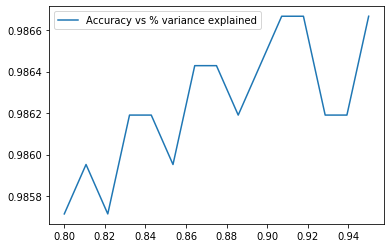

In [32]:
plt.figure()
plt.plot(n_s,np.array(accuracy),label='Accuracy vs % variance explained')
plt.legend()
plt.show()

In [34]:
pca = PCA(n_components=0.91)
pca.fit(train_x_deskew_minmax)
train_x_pca = pca.transform(train_x_deskew_minmax)
train_x_pca = pd.DataFrame(train_x_pca)
train_x_pca

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-2.831333,-2.064473,0.292725,0.894628,-0.394213,0.587229,1.099064,0.730856,0.382174,0.145311,...,-0.043755,0.177827,-0.035751,-0.062237,-0.129643,0.102142,0.002019,-0.064333,0.009148,0.121832
1,5.070121,0.083005,-0.554687,2.862094,0.548745,1.188118,1.472586,-0.152216,-0.104062,-0.082987,...,0.147575,-0.047548,0.225930,0.004446,-0.176443,-0.079856,-0.078666,-0.139467,-0.070181,0.046841
2,-2.989025,-1.717875,0.609285,1.489221,0.038773,0.470444,0.551889,0.359773,0.170749,0.602130,...,-0.017374,-0.152045,-0.029596,0.101149,0.040939,-0.048167,-0.010143,-0.039370,0.080454,-0.114349
3,0.144345,0.749449,0.806764,1.284375,-0.128008,-2.290930,-0.720178,-0.416997,1.109408,-0.203661,...,0.433888,0.118890,0.142124,0.498324,-0.102785,-0.350207,-0.323509,-0.113131,-0.255592,-0.009932
4,5.412481,0.087865,-1.317259,3.250667,1.065861,1.015387,1.535175,0.368292,-0.913332,-0.421665,...,0.166912,0.002783,-0.206120,0.016134,-0.163981,-0.292273,0.312407,0.094467,-0.179972,0.278382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,2.367404,-0.493737,-1.946958,3.275573,0.285309,-0.505212,1.024043,-0.524963,-0.169765,-0.435499,...,0.479307,0.648000,0.593271,0.017383,-0.178629,-0.020312,0.069653,-0.225711,-0.166402,-0.262372
41996,-3.229034,-1.579258,0.235385,1.268894,-0.195702,0.260785,0.854457,0.656307,0.066002,0.471923,...,0.116616,0.018101,0.086265,0.012537,0.110965,-0.126255,-0.017592,0.062386,-0.166740,-0.053985
41997,-0.362978,3.018570,-1.156332,1.122718,0.005515,2.205869,-1.773513,0.320822,1.818344,-0.787662,...,-0.176813,0.018282,0.112202,0.056061,-0.151695,-0.218754,-0.120990,0.261201,0.111347,-0.104888
41998,0.313959,-0.002364,3.680442,0.131490,-0.783265,0.640544,-0.538039,-0.916124,-0.348473,0.659876,...,0.184446,0.147193,-0.082757,0.426452,-0.176788,0.222286,0.163123,0.234043,-0.061982,0.212284


In [35]:
print(pca.explained_variance_ratio_)

[0.13789132 0.0943459  0.07103556 0.06252768 0.04917979 0.04199037
 0.03602013 0.02676086 0.02602739 0.02304625 0.01926841 0.01867989
 0.0169694  0.01589496 0.01463702 0.01278304 0.01270152 0.01148722
 0.01066344 0.00944637 0.00847923 0.00820109 0.00807981 0.00778814
 0.00752427 0.00703069 0.00669442 0.00644999 0.00612338 0.00592203
 0.00565045 0.00531889 0.00504147 0.00493973 0.00472345 0.00457334
 0.0043084  0.00425501 0.00405188 0.00382562 0.0037961  0.00365149
 0.00351936 0.00339482 0.00320801 0.00309157 0.00301225 0.00288885
 0.00282317 0.00275528 0.00272213 0.00265178 0.00258902 0.0025106
 0.00243158 0.0023865  0.00226136 0.00224013 0.00214661 0.0020747
 0.00201783 0.00196952 0.00194464 0.00185464 0.00177692 0.00173602
 0.00170624 0.00165973 0.00160678 0.00158967 0.00154895 0.00150376
 0.00147576 0.00142787]


# 5.Modeling

In [36]:
clf = SVC()
clf.fit(train_x_pca, train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# 6.Testing

In [38]:
test_x_pca = pca.transform(test_x_deskew_minmax)
test_x_pca = pd.DataFrame(test_x_pca)
test_x_pca

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,2.004526,0.276035,1.842684,-0.088970,3.411297,0.327099,-0.307218,0.290768,0.453166,0.127341,...,0.065256,0.146666,0.309478,-0.695497,0.043700,0.210864,0.140458,0.084522,0.111919,0.384269
1,2.845550,0.594646,0.281027,3.198423,0.674948,2.208782,0.986585,-0.162041,-0.055617,-1.811131,...,0.065040,0.173896,-0.039454,0.101808,0.222770,0.093779,0.115169,0.004728,0.067683,-0.051992
2,-1.303795,0.051278,-0.342434,0.316484,0.012735,-0.984140,-0.000561,-1.301845,-0.760564,0.792396,...,-0.083746,-0.092168,-0.110684,0.121155,0.102334,-0.180759,0.191000,0.188889,-0.120625,-0.046599
3,-1.360863,1.610034,1.381302,0.518070,0.521639,-0.407715,-1.505105,-0.453884,0.131560,-0.307336,...,0.370419,0.044777,-0.078944,-0.218092,0.167807,-0.225725,-0.257196,-0.520533,-0.121637,-0.029576
4,0.170710,-2.373352,-0.650586,-0.953151,0.909333,-0.190816,-1.516627,0.293182,-0.061394,-0.959500,...,0.128673,0.069754,-0.147297,0.002939,0.042259,0.324157,0.072861,-0.276871,-0.182246,-0.032509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,-0.648751,2.969372,-0.371897,-0.910779,0.062282,-0.210954,-0.151444,0.065001,-0.194441,0.304512,...,-0.040435,0.138936,-0.001286,0.020958,0.100904,0.133299,-0.236312,-0.190913,-0.120765,-0.055278
27996,-1.578513,1.889812,-0.804762,1.271985,0.381260,-0.125591,-1.806319,-0.713507,0.027067,-0.601456,...,-0.191283,-0.062142,0.101417,-0.008728,-0.067035,0.178713,-0.053817,-0.158135,0.150959,0.064200
27997,-0.083350,-1.983094,-2.480343,-0.719917,-0.208590,-0.351804,-1.318690,0.785495,0.416288,-0.717645,...,-0.170071,0.232917,-0.381249,0.058388,0.049471,-0.161089,-0.198302,-0.004242,0.056672,0.068208
27998,-1.032359,1.761351,-0.253984,-1.624347,-1.331773,-0.139480,-0.448059,1.484241,-1.507842,-0.895185,...,0.207911,0.148612,0.119871,0.103620,0.035526,-0.034404,0.022580,0.014834,-0.239322,0.067896


In [39]:
final=clf.predict(test_x_pca)
df=pd.DataFrame(final,columns=['Label'],index=np.arange(1,28001))

In [40]:
df.to_csv('subimission_deskew_91.csv',index_label='ImageId')

# score = 0.98685

# Referrence
* https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
* https://blog.csdn.net/hustqb/article/details/80628721
* https://kknews.cc/zh-tw/code/kvzpj5b.html
* https://www.kaggle.com/sanesanyo/digit-recognition-using-svm-with-98-accuracy